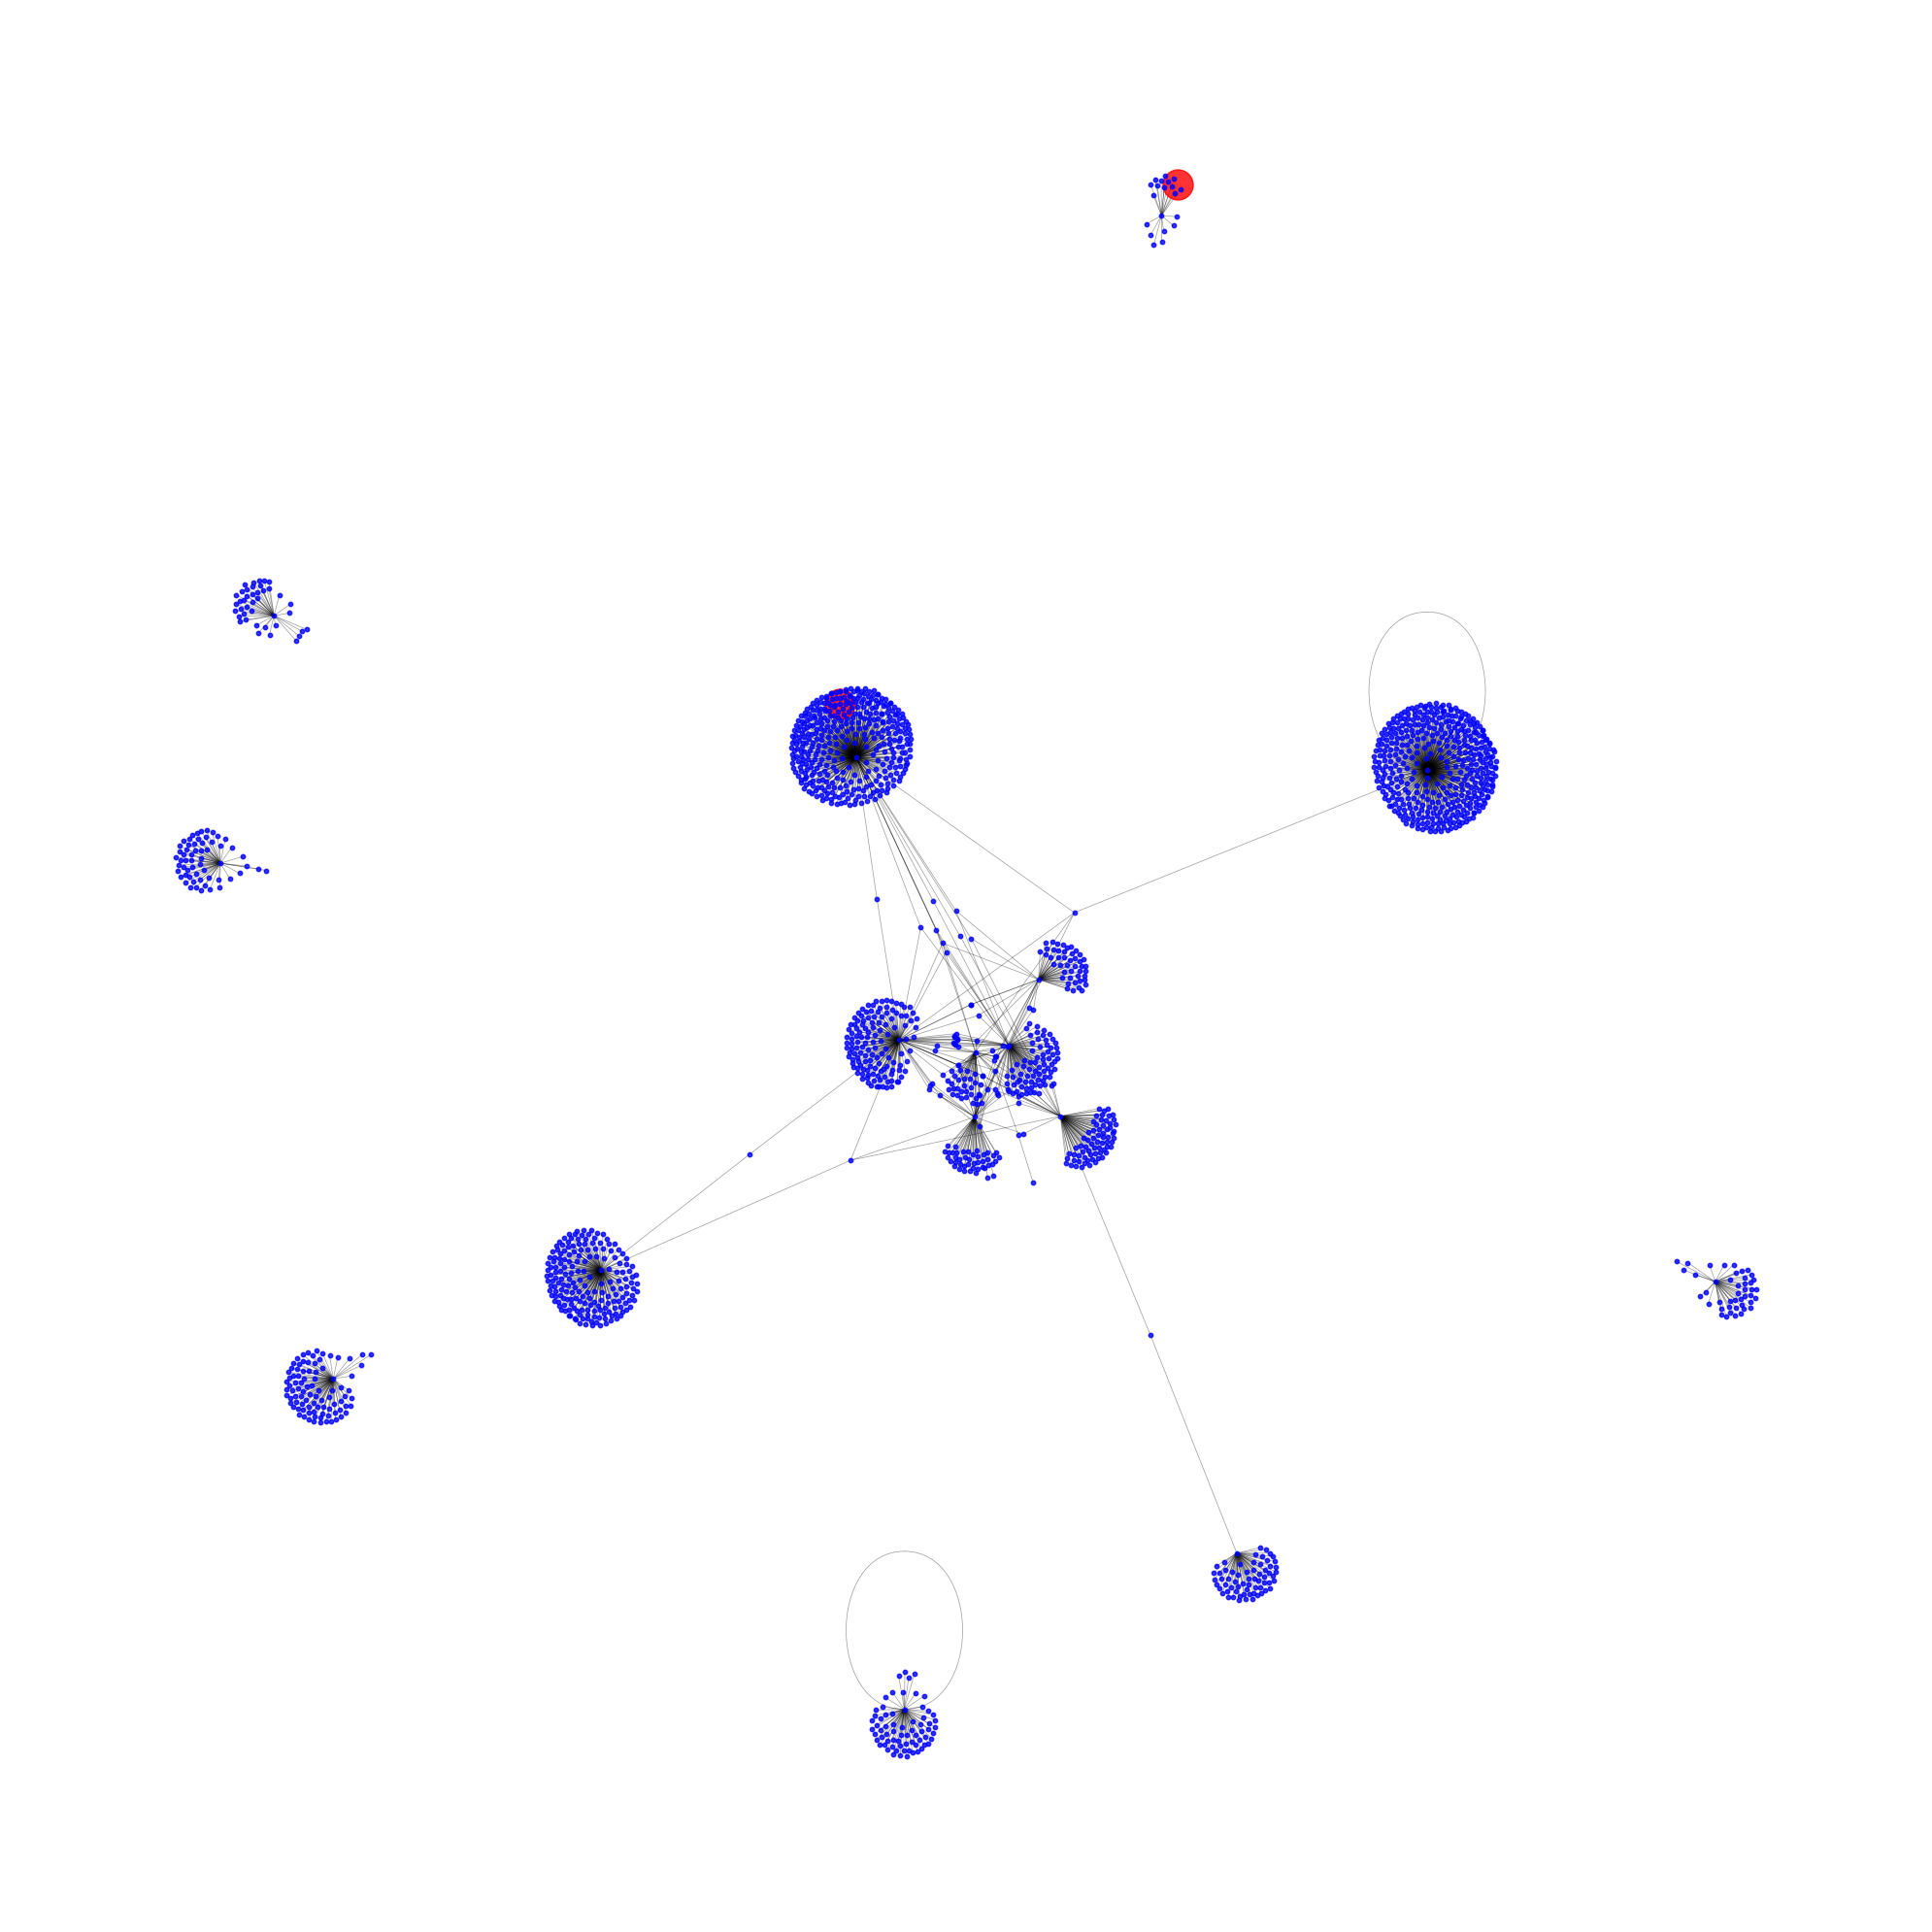

In [8]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            for uploader in uploaders:
                graph.add_edge(user_id, uploader)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=500, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='b', node_size=10, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.4)  # エッジの透明度を上げる
    # nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)

draw_bipartite_graph(bipartite_graph)

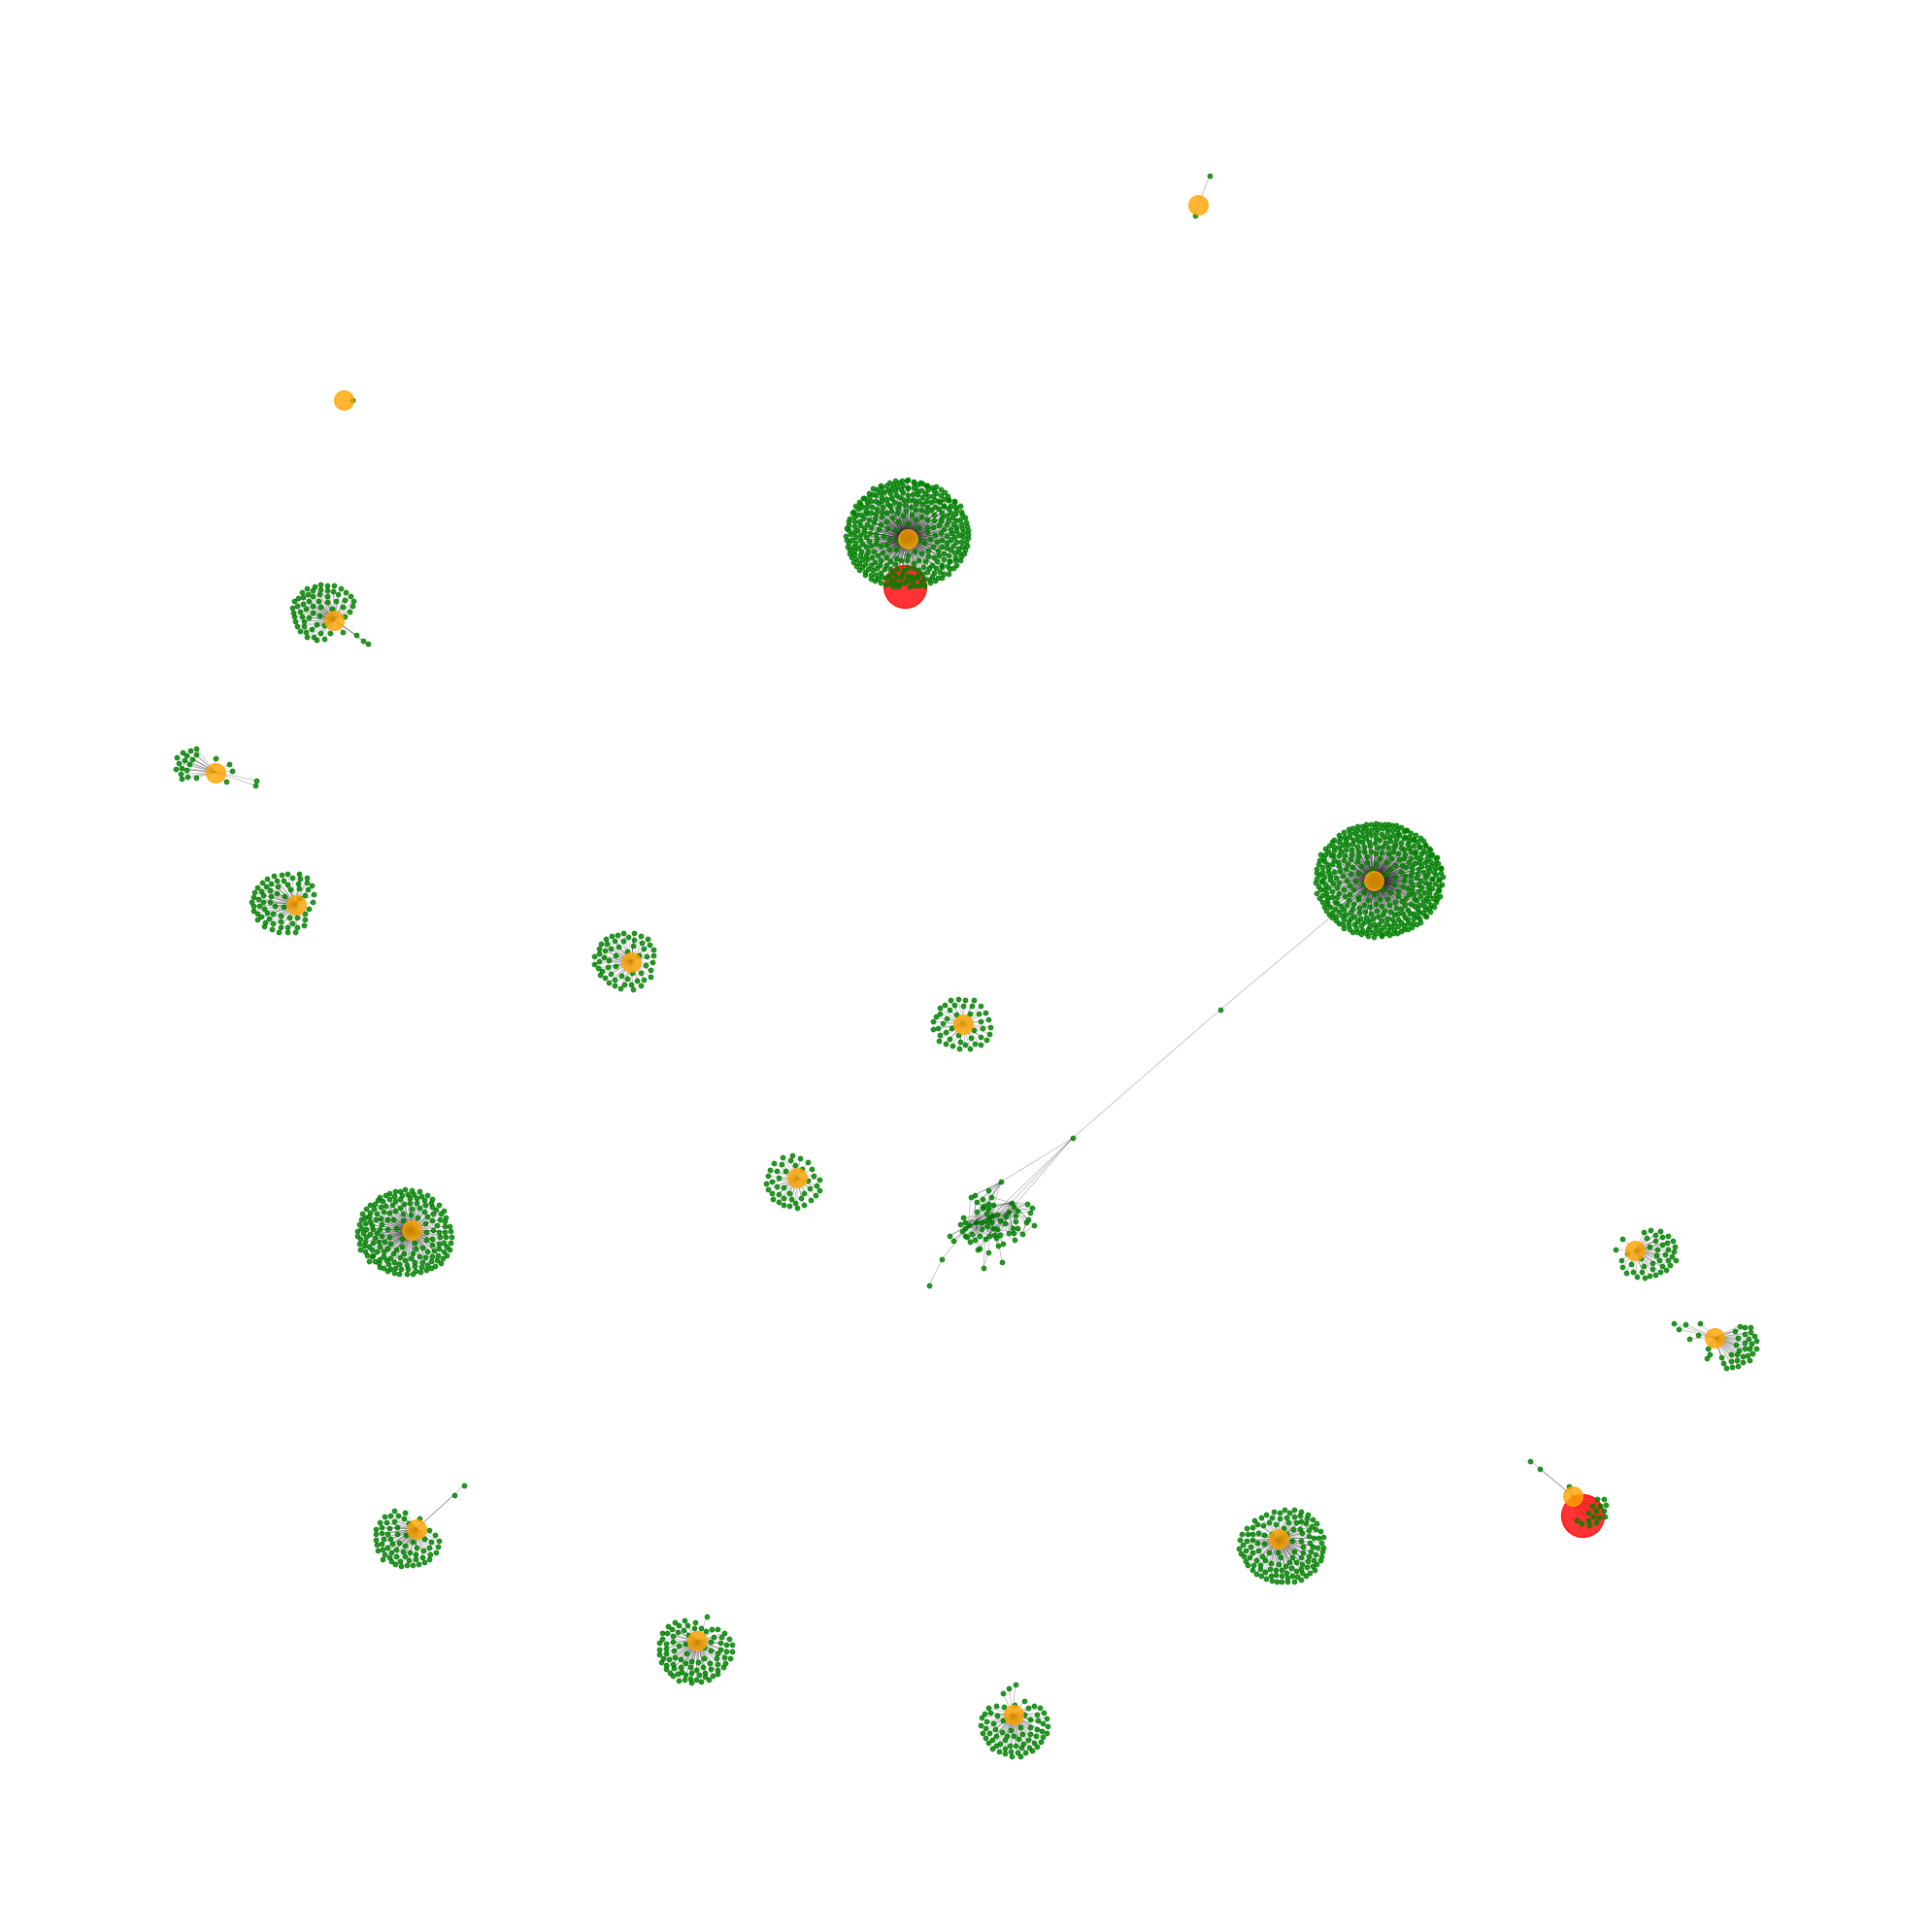

In [6]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    single_uploaders = defaultdict(list)
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            if len(uploaders) == 1:
                single_uploaders[uploaders[0]].append(user_id)
            else:
                for uploader in uploaders:
                    graph.add_edge(user_id, uploader)
    
    for uploader, users in single_uploaders.items():
        group_node = f"Group_{uploader}"
        for user in users:
            graph.add_edge(user, group_node)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ') and not n.startswith('Group_')]
    group_nodes = [n for n in G.nodes() if n.startswith('Group_')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='g', node_size=10, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=group_nodes, node_color='orange', node_size=200, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)  # エッジの透明度を上げる
    #nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)
draw_bipartite_graph(bipartite_graph)

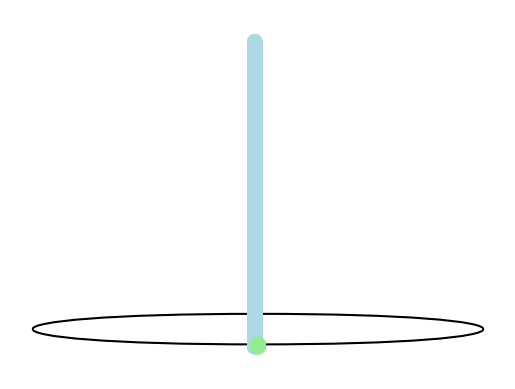

In [15]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(user_ids))
pos.update((n, (2, i)) for i, n in enumerate(uploaders))
nx.draw_networkx(G, pos, node_color=color_map, with_labels=False, node_size=100)

plt.axis('off')
plt.show()

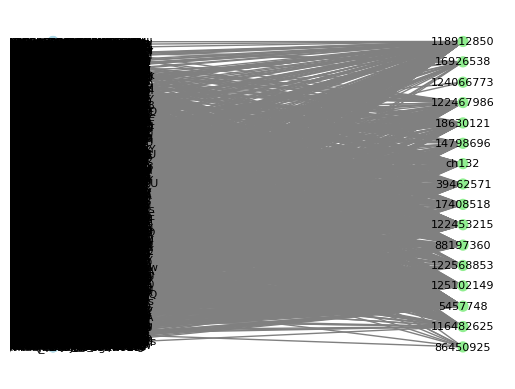

In [20]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()

{'16926538': 20, '5457748': 374, '88197360': 64, '116482625': 58, '17408518': 23, '122467986': 45, '86450925': 2, '122453215': 184, 'ch132': 89, '124066773': 1, '14798696': 43, '15378227': 69, '122568853': 40, '90869956': 421, '118912850': 129, '125102149': 71, '18630121': 42, '39462571': 67}
[('122453215', 184), ('17408518', 23), ('39462571', 67), ('90869956', 421), ('124066773', 1), ('122467986', 45), ('86450925', 2), ('88197360', 64), ('5457748', 374), ('18630121', 42), ('118912850', 129), ('125102149', 71)]
ywOOzdVvGhpAGG8S8iN3eBgzzno
R9mWdw6D2TmwtOckm58jeIoviwI
Q3HTvG6cn0aOkDcZboyWjNBlvAQ
z6azAFaZVD2_WcvH03ZOyCSxpio
aJ_J0VTyr0YS0YEz7Ji8QMqItBU
u6oNb7xDpW4TRuMu-fXggjCw3rM
r2Isz5LWrDAjB5vXuJ8eA7S2E8s
9z7pHaNlK5_7vn3sp1zBcsuoE5o
b9MFx88IKmMyOyBrtU5rH8OtvuI
xKrM66yeQeOk2Vp4mWDytXlU4SQ
wgkHAHO-3vvY5_L9O8BcVHIF8Os
q7rrPE5mto5UV2K3LAfkMIvY3to
G0-uvGwLnJQy54MbiIMtiekZOzY
3NnLxCtmwEXsW2sh0kfuUloVwJc
Tk7xm3k4dAOLAsn4tO2j7L-ajFc
MOIwgoWjSkl_D69yv3LPGHaqPW8
iNScBjikdXkRwCa8FVpbpk6FvdM
zXwzmJk

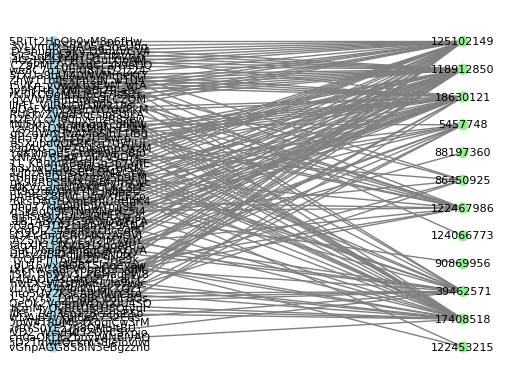

In [18]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

# unique_uploader_nameが複数あるuser_idを抽出
user_id_counts = {}
for user_id, _ in data:
    user_id_counts[user_id] = user_id_counts.get(user_id, 0) + 1



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count == 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

# アップローダーごとのuser_idの数を集計
uploader_user_counts = {}
for user_id, uploader in filtered_data:
    if uploader not in uploader_user_counts:
        uploader_user_counts[uploader] = 1
    else:
        uploader_user_counts[uploader] += 1

# 結果の表示
print(uploader_user_counts)



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count > 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

user_ids = list(set([pair[0] for pair in filtered_data]))
uploaders = list(set([pair[1] for pair in filtered_data]))


# uploadersリストにuploader_user_countsを組み込む
uploaders_with_counts = []
for uploader in uploaders:
    if uploader in uploader_user_counts:
        count = uploader_user_counts[uploader]
        uploaders_with_counts.append((uploader, count))

# 結果の表示
print(uploaders_with_counts)

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(filtered_data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
        print(node)
    else:
        color_map.append('lightgreen')
        print(node)

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()


In [19]:
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_uploaders_with_counts = []
for uploader, count in uploaders_with_counts:
    # uploadersリスト内のアップローダーの数を取得
    uploaders_count = uploaders.count(uploader)
    # 掛け合わせた値を計算
    weighted_count = count * uploaders_count
    # 結果をリストに保存
    weighted_uploaders_with_counts.append((uploader, weighted_count))

# 結果の表示
for entry in weighted_uploaders_with_counts:
    print(f"uploader: {entry[0]}, weighted_count: {entry[1]}")

uploader: 122453215, weighted_count: 184
uploader: 17408518, weighted_count: 23
uploader: 39462571, weighted_count: 67
uploader: 90869956, weighted_count: 421
uploader: 124066773, weighted_count: 1
uploader: 122467986, weighted_count: 45
uploader: 86450925, weighted_count: 2
uploader: 88197360, weighted_count: 64
uploader: 5457748, weighted_count: 374
uploader: 18630121, weighted_count: 42
uploader: 118912850, weighted_count: 129
uploader: 125102149, weighted_count: 71


In [7]:
import pandas as pd

# グラフGから左ノードと右ノードのリストを取得
left_nodes = [node for node in G if node in user_ids]
right_nodes = [node for node in G if node in uploaders]

# 接続の有無を確認し、表に変換
connection_matrix = pd.DataFrame(index=left_nodes, columns=right_nodes)
for left_node in left_nodes:
    for right_node in right_nodes:
        if G.has_edge(left_node, right_node):
            connection_matrix.at[left_node, right_node] = 1
        else:
            connection_matrix.at[left_node, right_node] = 0

connection_matrix

,122453215,17408518,39462571,90869956,124066773,122467986,86450925,88197360,5457748,18630121,118912850,125102149
ywOOzdVvGhpAGG8S8iN3eBgzzno,0,0,0,0,0,0,0,0,0,1,0,1
R9mWdw6D2TmwtOckm58jeIoviwI,0,1,0,0,0,0,0,0,0,0,0,1
Q3HTvG6cn0aOkDcZboyWjNBlvAQ,0,0,1,0,0,0,0,0,1,0,0,0
z6azAFaZVD2_WcvH03ZOyCSxpio,0,0,0,0,0,0,0,0,0,0,1,1
aJ_J0VTyr0YS0YEz7Ji8QMqItBU,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
ubPop4-84OzHK4XFH1uGulXJoAM,0,0,0,0,0,0,0,0,0,0,1,1
5cD4nR8SjGSnBLkZp7QYTiMVryY,0,0,0,0,0,0,0,0,0,0,1,1
7DKMQSCD-Shuqpcakv-D9uVVGV4,0,1,1,0,1,1,1,0,0,1,1,1
xmjrd4CC3yLvmdxSdA05aSheUog,0,0,0,0,0,0,0,0,0,0,1,1


In [25]:
# 重み付けを施すためのコード
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_connection_matrix = connection_matrix.copy()
for uploader, count in uploaders_with_counts:
    uploaders_count = uploaders.count(uploader)
    weighted_count = count * uploaders_count
    # 重み付けを施す
    for left_node in left_nodes:
        for right_node in right_nodes:
            if G.has_edge(left_node, right_node) and right_node == uploader:
                weighted_connection_matrix.at[left_node, right_node] *= weighted_count

# 重み付けを施した表の表示
weighted_connection_matrix

,122453215,17408518,39462571,90869956,124066773,122467986,86450925,88197360,5457748,18630121,118912850,125102149
ywOOzdVvGhpAGG8S8iN3eBgzzno,0,0,0,0,0,0,0,0,0,42,0,71
R9mWdw6D2TmwtOckm58jeIoviwI,0,23,0,0,0,0,0,0,0,0,0,71
Q3HTvG6cn0aOkDcZboyWjNBlvAQ,0,0,67,0,0,0,0,0,374,0,0,0
z6azAFaZVD2_WcvH03ZOyCSxpio,0,0,0,0,0,0,0,0,0,0,129,71
aJ_J0VTyr0YS0YEz7Ji8QMqItBU,0,0,0,0,0,0,0,0,374,0,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...
ubPop4-84OzHK4XFH1uGulXJoAM,0,0,0,0,0,0,0,0,0,0,129,71
5cD4nR8SjGSnBLkZp7QYTiMVryY,0,0,0,0,0,0,0,0,0,0,129,71
7DKMQSCD-Shuqpcakv-D9uVVGV4,0,23,67,0,1,45,2,0,0,42,129,71
xmjrd4CC3yLvmdxSdA05aSheUog,0,0,0,0,0,0,0,0,0,0,129,71
